# Dimensionality Reduction using Classical Multiview Multidimensional Scaling (MVMDS)

MVMDS is a useful multiview dimensionaltiy reduction algorithm that allows the user to perform Multidimensional Scaling on multiple views at the same time.

In [6]:
from mvlearn.datasets.base import load_UCImultifeature
from mvlearn.embed.mvmds import MVMDS

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline


### Load Data
Data comes from UCI Digits Data. Contains 6 views and classifications of numbers 0-9

In [8]:
# Load full dataset, labels not needed
data = load_UCImultifeature(select_labeled='all')

Xs = data[0]
y = data[1]

NameError: name 'make_blobs' is not defined

In [3]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


### MVMDS Views Without Noise

Here we will take into account all of the views and perform MVMDS. This dataset does not contain noise and each view performs decently well in predicting the number. Therefore we will expect the common components created by MVMDS to create a strong representation of the data *(Note MVMDS only uses the fit_transform function to properly return the correct components)*

In the cell after, PCA on one view is shown for comparison. It can be seen that MVMDS seems to perform better in this instance. 

*Note: Each color represents a unique number class*



In [6]:
#perform mvmds

mvmds = MVMDS(n_components=5)

Components = mvmds.fit_transform(Xs)

Text(0.5, 1.0, 'First 4 MVMDS Components Computed With 6 Views (No Noise)')

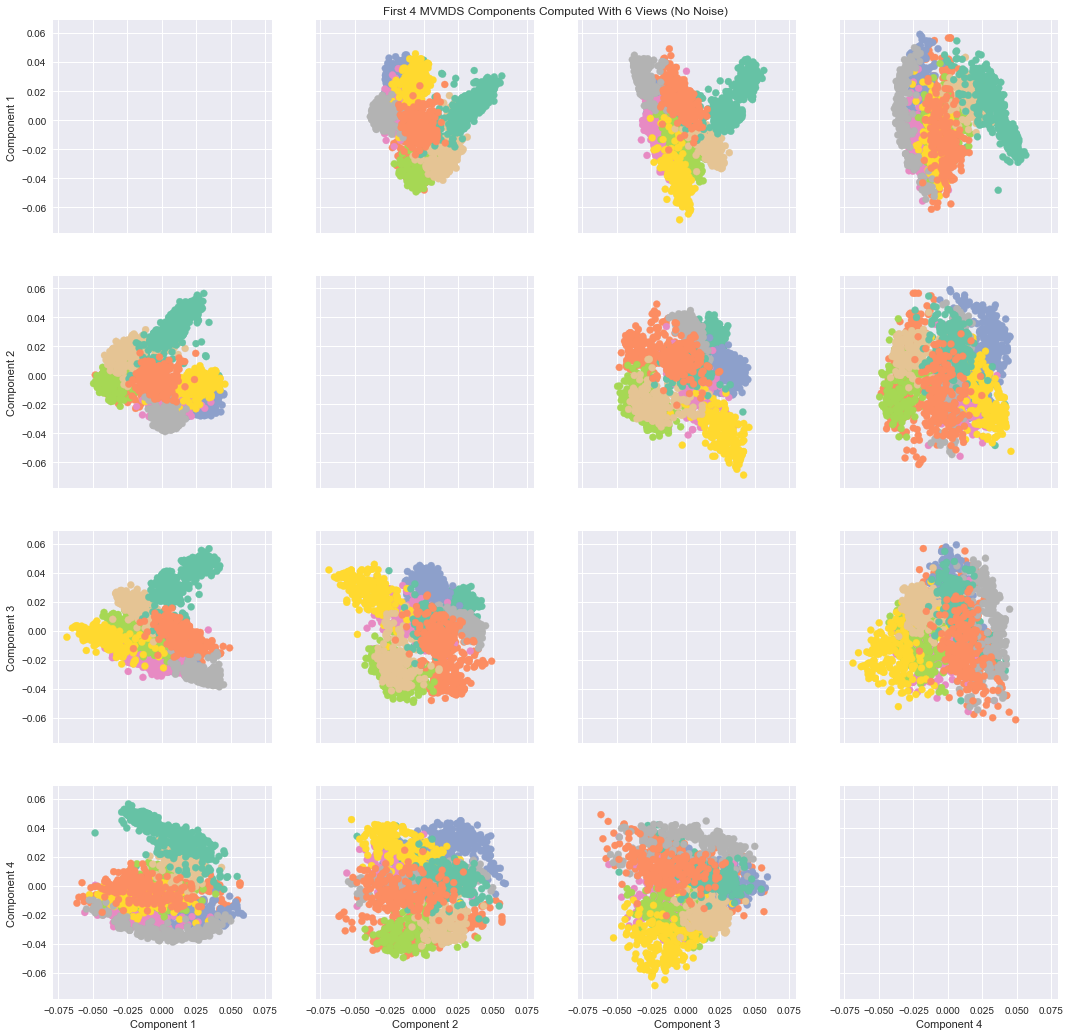

In [10]:
# Plot MVMDS images

plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = Components[:, i], y = Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')


ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 MVMDS Components Computed With 6 Views (No Noise)')
    


Text(0.5, 1.0, 'First 4 PCA Components Computed With 1 View')

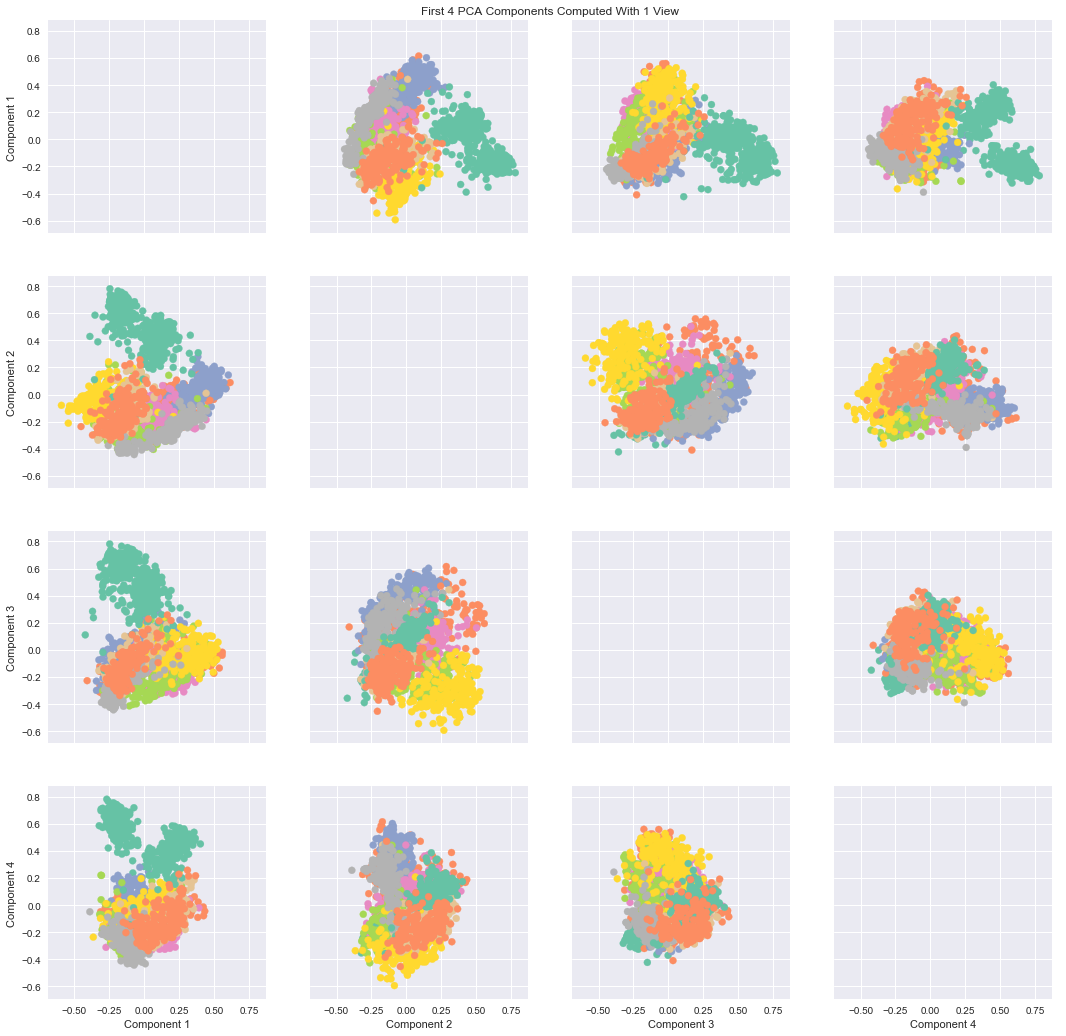

In [7]:
#PCA Plots

pca = PCA(n_components=6)
pca_Components = pca.fit_transform(Xs[0])

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = pca_Components[:, i], y = pca_Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 PCA Components Computed With 1 View')


### MVMDS Views With Noise

Here we will create a new variable with multiple views. This variable will contain the first 4 views of the UCI Digit Dataset. The 5th and 6th view will be a random, noisy array with the same shape as the first and second views respectively. We can expect for the common components created by MVMDS to be less representative of the data due to the substantial noise.

As we can see compared to previous cells, the noisy MVMDS components seem to separate worse than the MVMDS components without noise. Even when compared to PCA, noisy MVMDS does not seem to perform as well.

*Note: Each color represents a unique number class*

In [8]:
# Create view with 5 views of UCI digits data and 1 view of noise

Noisy_View1 = np.random.rand(Xs[0].shape[0], Xs[0].shape[1])
Noisy_View2 = np.random.rand(Xs[1].shape[0], Xs[1].shape[1])


Noisy_Xs = [Xs[0], Xs[1], Xs[2], Xs[3],Noisy_View1, Noisy_View2]

mvmds = MVMDS(n_components=6)
Noisy_Components = mvmds.fit_transform(Noisy_Xs)

Text(0.5, 1.0, 'First 4 MVMDS Components Computed With 6 Views (Noise)')

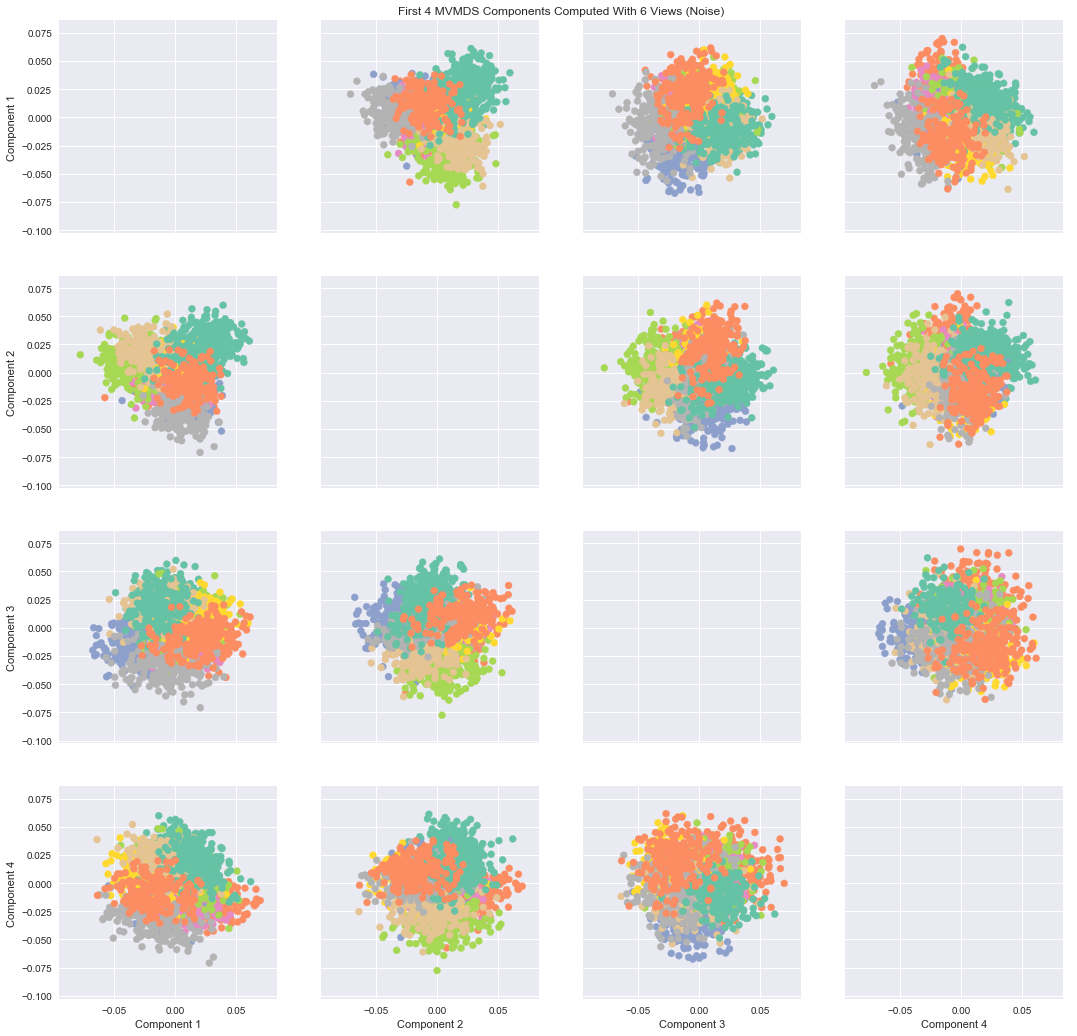

In [9]:
# Plot noisy MVMDS Images

plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(4, 4, figsize = (18,18), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = Noisy_Components[:, i], y = Noisy_Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 MVMDS Components Computed With 6 Views ( 2 Noisy Views)')
